In [11]:
!pip install keras

In [0]:
#!pip install --upgrade tensorflow 

In [13]:
!pip install tensorflow

In [0]:
#!pip install tensorflow-gpu

In [0]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import *
from keras.layers.pooling import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Parameters


In [0]:
model = Sequential([
        Conv2D(100, kernel_size =(3,3), strides = 2 ,input_shape = (200,300,3), activation = "relu", padding = "same"),
        Conv2D(200, kernel_size =(3,3), strides = 2 , activation = "relu", padding = "same"),
        Conv2D(400, kernel_size =(3,3), strides = 2 , activation = "relu", padding = "same"),
        
  ])


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 150, 100)     2800      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 75, 200)       180200    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 38, 400)       720400    
Total params: 903,400
Trainable params: 903,400
Non-trainable params: 0
_________________________________________________________________


CNN on MINST

In [18]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.9751 - acc: 0.8800 - val_loss: 0.0700 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.1156 - acc: 0.9670 - val_loss: 0.0534 - val_acc: 0.9826
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0847 - acc: 0.9758 - val_loss: 0.0469 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0685 - acc: 0.9800 - val_loss: 0.0370 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0550 - acc: 0.9842 - val_loss: 0.0412 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0485 - acc: 0.9855 - val_loss: 0.0323 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.0442 - acc: 0.9873 - val_loss: 0.0342 - val_acc

#Task 8


In [21]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [22]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
import os

directory = "/content/drive/My Drive/Colab Notebooks/data/ML_Photos"
all_image_paths = []
for filename in os.listdir(directory):
  if filename.endswith(".jpg"): 
      all_image_paths.append(os.path.join(directory, filename))

In [25]:
from PIL import Image
import numpy as np

channels = 3
height = 299
width = 299

def load_image( infilename,height,width ) :
    img = Image.open( infilename )
    img.load()
    img = img.resize((height, width), Image.ANTIALIAS)
    img.show()
    data = np.asarray( img,dtype="float32" ) /255
    return data
  
data = {}
image_names = []
for image in all_image_paths:
  print(os.path.basename(image).split('.')[0])
  name = os.path.basename(image).split('.')[0]
  image_names.append(name)
  data[name] = load_image(image,height,width)

chick
bird
dog
ham
cat
duck
el
fox
lion


In [0]:
import keras

In [0]:
path =  "/content/drive/My Drive/Colab Notebooks/data/"

In [0]:
all_class_names = ["background"]

class_file = open("/content/drive/My Drive/Colab Notebooks/data/ClassLabels.txt")
lines = class_file.readlines()
for line in lines:
  elements = line.split(',')
  first_ele = elements[0].split(' ')[1]
  first_ele.rstrip("\n")
  if len(elements) == 1:
    all_class_names.append(first_ele.rstrip("\n"))
  else:
    for next_ele in elements[1:]:
      first_ele = first_ele + ", " + next_ele.rstrip("\n")
    all_class_names.append(first_ele)

In [29]:
len(all_class_names)

1001

In [30]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

seed = 45
tf.reset_default_graph()
tf.set_random_seed(seed)
np.random.seed(seed)
X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")

with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.


In [31]:
end_points["Predictions"]

<tf.Tensor 'InceptionV3/Predictions/Reshape_1:0' shape=(?, 1001) dtype=float32>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def classify_images(data,name):
  test_image = data
  test_image = 2 * test_image - 1
  X_test = test_image.reshape(-1, height, width, channels)

  with tf.Session() as sess:
      saver.restore(sess, "/content/drive/My Drive/Colab Notebooks/data/inception_v3.ckpt")
      predictions_val = predictions.eval(feed_dict={X: X_test})

  top_5 = np.argpartition(predictions_val[0], -5)[-5:]
  top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
  print("\n")
  print("CLASSIFICATION OF: " + name + "\n" )
  for i in top_5:
      print("{0}: {1:.2f}%".format(all_class_names[i], 100 * predictions_val[0][i]))

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/data/inception_v3.ckpt


CLASSIFICATION OF: chick

hen: 44.07%
vulture: 4.02%
goose: 2.52%
white,  Ciconia ciconia: 1.58%
albatross,  mollymawk: 1.43%
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/data/inception_v3.ckpt


CLASSIFICATION OF: bird

hummingbird: 93.62%
water,  dipper: 0.39%
kite: 0.28%
great,  great gray owl,  Strix nebulosa: 0.20%
jacamar: 0.11%
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/data/inception_v3.ckpt


CLASSIFICATION OF: dog

papillon: 47.53%
Saint,  St Bernard: 11.24%
Brittany: 6.80%
Cardigan,  Cardigan Welsh corgi: 4.94%
Blenheim: 3.40%
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/data/inception_v3.ckpt


CLASSIFICATION OF: ham

fox,  eastern fox squirrel,  Sciurus niger: 90.00%
wood,  cottontail,  cottontail rabbit: 0.39%
hare: 0.38%
corn: 0.09%
marmot: 0.08%
INFO:ten

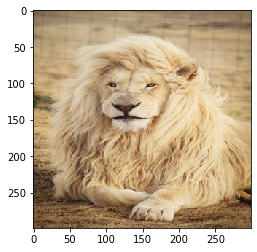

In [33]:
for key in image_names:
  image_data = data[key]
  plt.imshow(image_data)
  classify_images(image_data,key)